# Traveling salesman problem
* Goal: Find the shortest distance to trvel through each node and back

In [38]:
# Import all necessary libraries
import tsplib95
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing

In [2]:
# Load the tsp file and get dimension and coordinates
def load_tsp_problem(file_path):
    problem = tsplib95.load(file_path)
    return problem.dimension, problem.node_coords

In [3]:
# Initialize population based on the dimensions and predetermined population size
def initialize_population(num_cities, population_size):
    pop = []
    for _ in range(population_size):
        pop.append(random.sample(range(num_cities), num_cities))
        # Using random.sample to generate a random array with n number of cities
    return pop

# Fitness calculation

In [29]:
# Calculates the distance between each coordinates and adds up to total distance
def calculate_route_distance(route, coords):
    # This function calculates the distance between 2 coordinates.
    # It is utilizing the formula d=√((x2 – x1)² + (y2 – y1)²)
    dist = 0
    for i in range(len(route) - 1):
        x1, y1 = coords[route[i] + 1]
        x2, y2 = coords[route[i + 1] + 1]
        dist += math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    x1, y1 = coords[route[-1] + 1]
    x2, y2 = coords[route[0] + 1]
    dist += math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return dist


# Iterates through the population and returns only the routes
def calculate_fitness(population, coords):
    fitness_pop = []
    for route in population:
        distance = calculate_route_distance(route, coords)  # Compute the fitness value
        fitness_pop.append((route, distance))  # Store route with its distance
    
    return [route for route, _ in fitness_pop]  # Return only the routes



# Selection

In [63]:
# Picks a random sample and picks the shortest distance
def tournament_selection(population, coords, k=5):
    tournament = random.sample(population, k) # Picks a random sample of k number
    return min(tournament, key=lambda route: calculate_route_distance(route, coords)) # Takes the minimum distance using key from lambda function


# Crossover and mutation

In [68]:
# Using order crossover we take 2 parents and extract a subsequence from parent 1.
# Then merging parent 2 with the subsequence
# VERY IMPORTANT: Here we need to remember that the individual cant have duplicates of cities.
# We therefore have to check for duplicated genes and replace with the right genes so the strucutre is correct.
def order_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1] * size
    child[start:end+1] = parent1[start:end+1]
    idx = 0
    for gene in parent2:
        if gene not in child:
            while child[idx] != -1:
                idx += 1
            child[idx] = gene
    return child

# Here we use swap mutation.
# Picking a random sample of the individual and swap their places
def swap_mutation(individual):
    i, j = random.sample(range(len(individual)), 2)
    individual[i], individual[j] = individual[j], individual[i]
    return individual

# GA Model

In [69]:
def genetic_algorithm(file_path, population_size, generations=1000, mutation_rate=0.3, crossover_rate=0.5, tournament_size=5):
    # Loading the problem and intitializing the population
    num_cities, coords = load_tsp_problem(file_path)
    population = initialize_population(num_cities, population_size)
    convergence = []

    for gen in range(generations):
        # Evaluate fitness and sort population
        population = calculate_fitness(population, coords)
        convergence.append(calculate_route_distance(population[0], coords))

        # Collect training metrics
        distances = [calculate_route_distance(route, coords) for route in population]
        best_distance = min(distances)

        # Output metrics every 10 generations
        if (gen + 1) % 10 == 0:
            print(f"Generation {gen + 1}: Best Distance = {best_distance}")

        # Create new population
        new_pop = []
        while len(new_pop) < population_size:
            p1 = tournament_selection(population, coords, tournament_size)
            p2 = tournament_selection(population, coords, tournament_size)
            child = order_crossover(p1, p2) if random.random() < crossover_rate else p1[:]
            if random.random() < mutation_rate:
                child = swap_mutation(child)
            new_pop.append(child)

        population = new_pop  # Replace old population

    return convergence, population[0], coords


# Plotting and visualization

In [19]:
# plot used to show the fitness change over each generation
def plot_convergence(convergence):
    plt.plot(convergence)
    plt.xlabel("Generations")
    plt.ylabel("Best Distance")
    plt.title("Genetic Algorithm Convergence")
    plt.show()

# A coordinate map that shows the best route created
def plot_solution(best_route, coords):
    path = [coords[city + 1] for city in best_route] + [coords[best_route[0] + 1]]
    x, y = zip(*path)
    plt.plot(x, y, marker='o')
    plt.title("Best Route")
    plt.show()

# Example

Generation 10: Best Distance = 547767.2177637093
Generation 20: Best Distance = 508244.02614449174
Generation 30: Best Distance = 475658.2237786116
Generation 40: Best Distance = 452092.4971051797
Generation 50: Best Distance = 438932.3075545986
Generation 60: Best Distance = 418682.70035107434
Generation 70: Best Distance = 408933.31504306203
Generation 80: Best Distance = 397534.94912082714
Generation 90: Best Distance = 387165.53309548285
Generation 100: Best Distance = 382953.7250901262
Generation 110: Best Distance = 375459.6562015507
Generation 120: Best Distance = 369223.40754746395
Generation 130: Best Distance = 362443.3142380413
Generation 140: Best Distance = 361577.7241769514
Generation 150: Best Distance = 356878.70220116456
Generation 160: Best Distance = 353169.9724999581
Generation 170: Best Distance = 351131.93724354566
Generation 180: Best Distance = 344381.08402858564
Generation 190: Best Distance = 343353.72321450734
Generation 200: Best Distance = 340613.8049940549

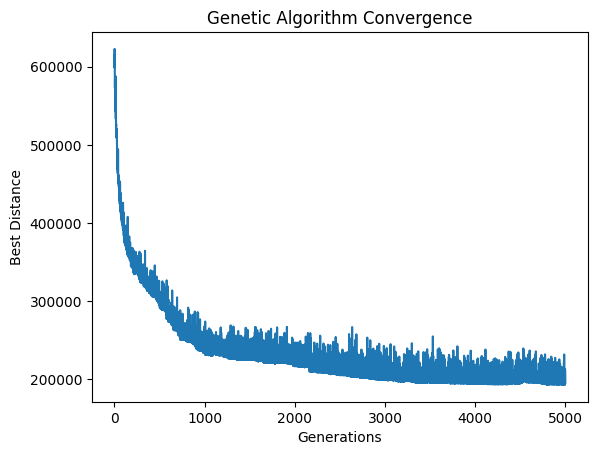

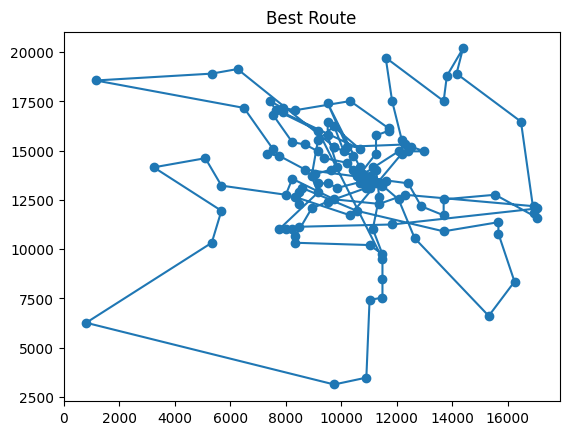

In [71]:
tsp_file = "/Users/ap/Documents/MLroadtowisdom/ACIT4610/ALL_tsp/bier127.tsp"
population_size = 50

convergence, best_route, coords = genetic_algorithm(tsp_file, population_size=50, generations=5000, mutation_rate=0.5, crossover_rate=0.5, tournament_size=3)
plot_convergence(convergence)
plot_solution(best_route, coords)


Running GA with Population = 20, Tournament Size = 3
Generation 10: Best Distance = 548407.2526164234
Generation 20: Best Distance = 518362.7649829293
Generation 30: Best Distance = 503463.32852100447
Generation 40: Best Distance = 487835.76932788716
Generation 50: Best Distance = 462039.82769592246
Generation 60: Best Distance = 452248.0674726242
Generation 70: Best Distance = 427923.2884178288
Generation 80: Best Distance = 420883.6801359603
Generation 90: Best Distance = 406836.00863643095
Generation 100: Best Distance = 400453.4595028607
Generation 110: Best Distance = 393275.52725389675
Generation 120: Best Distance = 389304.9592739626
Generation 130: Best Distance = 380469.01214076194
Generation 140: Best Distance = 368345.32123388693
Generation 150: Best Distance = 366969.9790337872
Generation 160: Best Distance = 363886.3172993096
Generation 170: Best Distance = 358480.4646083461
Generation 180: Best Distance = 354899.92588976887
Generation 190: Best Distance = 350669.30471208

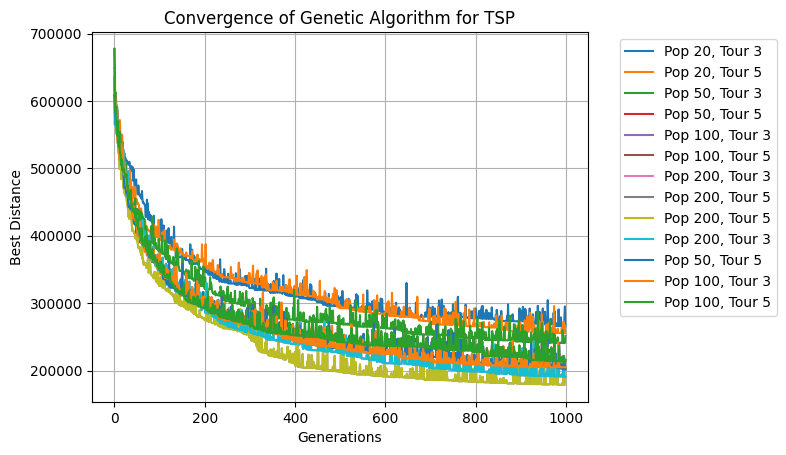


=== Summary of Best Distances ===
Configuration        Best Distance   Avg Distance    Diversity       Time (s)  
Pop 20, Tour 3       265953.00       270513.29       9554.57         13.98     
Pop 20, Tour 5       255505.22       259651.10       6129.23         19.36     
Pop 50, Tour 3       241069.13       244570.83       6175.81         33.11     
Pop 50, Tour 5       201792.83       205521.76       4459.22         48.56     
Pop 100, Tour 3      205001.15       205001.15       0.00            67.10     
Pop 100, Tour 5      211064.43       214536.75       3750.08         98.39     
Pop 200, Tour 3      190969.64       193301.31       3493.10         136.82    
Pop 200, Tour 5      178821.21       183567.94       6974.48         200.01    


In [67]:
import matplotlib.pyplot as plt
import time
import numpy as np

# Test configuration
tsp_file = "/Users/ap/Documents/MLroadtowisdom/ACIT4610/ALL_tsp/bier127.tsp"
population_sizes = [20, 50, 100, 200]  # Population size variations
tournament_sizes = [3, 5]  # Tournament size variations
generations = 1000
mutation_rate = 0.3
crossover_rate = 0.5

# Store results
results = {}

# Loop through all combinations of population sizes and tournament sizes
for pop_size in population_sizes:
    for tour_size in tournament_sizes:
        print(f"\nRunning GA with Population = {pop_size}, Tournament Size = {tour_size}")
        start_time = time.time()  # Start time tracking
        
        # Run Genetic Algorithm
        convergence, best_route, coords = genetic_algorithm(
            file_path=tsp_file,
            population_size=pop_size,
            generations=generations,
            mutation_rate=mutation_rate,
            crossover_rate=crossover_rate,
            tournament_size=tour_size
        )
        
        end_time = time.time()  # End time tracking
        elapsed_time = end_time - start_time  # Calculate time
        
        # Store results
        key = f"Pop {pop_size}, Tour {tour_size}"
        best_distance = min(convergence)
        avg_distance = np.mean(convergence[-10:])  # Avg of last 10 generations
        diversity = np.std(convergence[-10:])  # Std Dev of last 10 generations
        
        results[key] = {
            'convergence': convergence,
            'best_distance': best_distance,
            'avg_distance': avg_distance,
            'diversity': diversity,
            'time': elapsed_time
        }
        
        # Plot convergence for this configuration
        plt.plot(convergence, label=key)

# Plot all convergence curves together
plt.xlabel("Generations")
plt.ylabel("Best Distance")
plt.title("Convergence of Genetic Algorithm for TSP")
plt.grid(True)

# Only label the best-performing curves to avoid clutter
top_results = sorted(results.items(), key=lambda x: x[1]['best_distance'])[:5]
for key, data in top_results:
    plt.plot(data['convergence'], label=key)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print summary of all results
print("\n=== Summary of Best Distances ===")
print(f"{'Configuration':<20} {'Best Distance':<15} {'Avg Distance':<15} {'Diversity':<15} {'Time (s)':<10}")
print("="*75)

for key, data in results.items():
    print(f"{key:<20} {data['best_distance']:<15.2f} {data['avg_distance']:<15.2f} {data['diversity']:<15.2f} {data['time']:<10.2f}")


Generation 10: Best Distance = 485814.7586505975
Generation 20: Best Distance = 430011.35118550784
Generation 30: Best Distance = 380198.3539999928
Generation 40: Best Distance = 359639.7794550928
Generation 50: Best Distance = 337493.9301333753
Generation 60: Best Distance = 318263.1375335468
Generation 70: Best Distance = 292409.31868084177
Generation 80: Best Distance = 283141.4063015427
Generation 90: Best Distance = 273059.3265645401
Generation 100: Best Distance = 266241.40685220703
Generation 110: Best Distance = 255685.27351821086
Generation 120: Best Distance = 251147.2307654479
Generation 130: Best Distance = 244927.55429693562
Generation 140: Best Distance = 237488.541251238
Generation 150: Best Distance = 232579.33299213843
Generation 160: Best Distance = 229433.1071616453
Generation 170: Best Distance = 225960.78160201886
Generation 180: Best Distance = 222880.7639006494
Generation 190: Best Distance = 219155.2628301001
Generation 200: Best Distance = 214763.32665571058
Ge

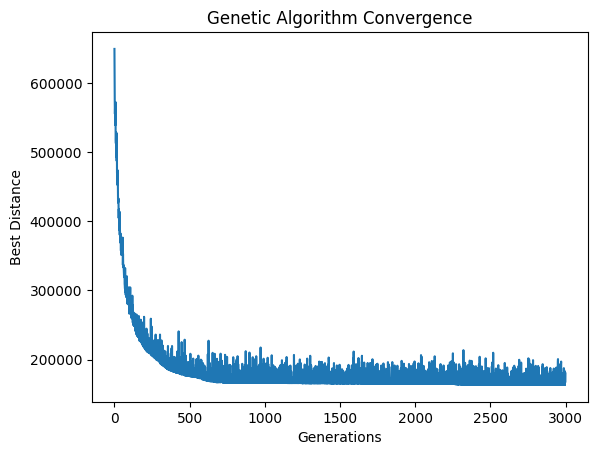

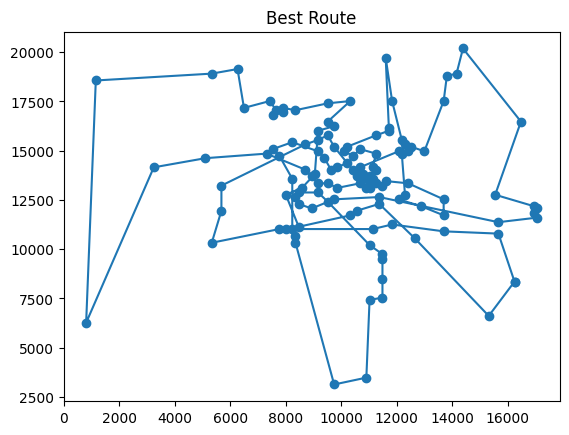

In [72]:
tsp_file = "/Users/ap/Documents/MLroadtowisdom/ACIT4610/ALL_tsp/bier127.tsp"
population_size = 1000

convergence, best_route, coords = genetic_algorithm(tsp_file, population_size, generations=3000, mutation_rate=0.5, crossover_rate=0.5, tournament_size=5)
plot_convergence(convergence)
plot_solution(best_route, coords)